In [1]:
import pandas as pd
import glob
import os

folder_path = "/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Working"

# Get a list of all CSV files in the current directory
csv_files = glob.glob(os.path.join(folder_path, "cleaned_TradeData_Gold_*.csv"))

print(f"Found {len(csv_files)} files:")
for file in csv_files:
    print(f" - {file}")

# Combine all CSVs into one DataFrame
combined_df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

print(f"\n✅ Combined DataFrame has {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")
combined_df.head()

Found 0 files:


ValueError: No objects to concatenate

In [27]:
combined_df.head()

,refPeriodId,refYear,month,reporterCode,reporting_country,reporterDesc,flowCode,flowDesc,partnerCode,partner_country,...,motDesc,qtyUnitCode,unit,quantity,net_weight_kg,gross_weight_kg,cif_value,fob_value,primaryValue,year
0,2018,52,2018,ZAF,South Africa,X,Export,0,W00,World,...,-1,NaN,0.000,True,True,False,5.407915e+09,5.407915e+09,6,2018
1,2018,52,2018,ZAF,South Africa,X,Export,516,NAM,Namibia,...,8,kg,161.693,True,True,False,1.773462e+05,1.773462e+05,6,2018
2,2018,52,2018,ZAF,South Africa,X,Export,748,SWZ,Eswatini,...,-1,NaN,0.000,True,True,False,4.386340e+02,4.386340e+02,6,2018
3,2019,52,2019,GHA,Ghana,X,Export,0,W00,World,...,-1,NaN,0.000,True,True,False,6.198864e+09,6.198864e+09,6,2019
4,2019,52,2019,GHA,Ghana,X,Export,410,KOR,Rep. of Korea,...,8,kg,4.719,True,True,False,1.896175e+05,1.896175e+05,6,2019


In [35]:
# Summary of data structure
combined_df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Basic statistics
combined_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   refPeriodId        24 non-null     object 
 1   refYear            24 non-null     object 
 2   month              24 non-null     object 
 3   reporterCode       24 non-null     object 
 4   reporting_country  24 non-null     object 
 5   reporterDesc       24 non-null     object 
 6   flowCode           24 non-null     object 
 7   flowDesc           24 non-null     object 
 8   partnerCode        24 non-null     object 
 9   partner_country    24 non-null     object 
 10  partnerDesc        24 non-null     object 
 11  commodity          24 non-null     object 
 12  cmdDesc            24 non-null     object 
 13  aggrLevel          24 non-null     object 
 14  isLeaf             24 non-null     object 
 15  customsCode        24 non-null     object 
 16  customsDesc        24 non-nu

NameError: name 'df' is not defined

In [39]:
# Show data types
combined_df.dtypes


refPeriodId           object
refYear               object
month                 object
reporterCode          object
reporting_country     object
reporterDesc          object
flowCode              object
flowDesc              object
partnerCode           object
partner_country       object
partnerDesc           object
commodity             object
cmdDesc               object
aggrLevel             object
isLeaf                object
customsCode           object
customsDesc           object
mosCode               object
motCode               object
motDesc               object
qtyUnitCode           object
unit                 float64
quantity              object
net_weight_kg         object
gross_weight_kg       object
cif_value            float64
fob_value            float64
primaryValue          object
year                  object
dtype: object

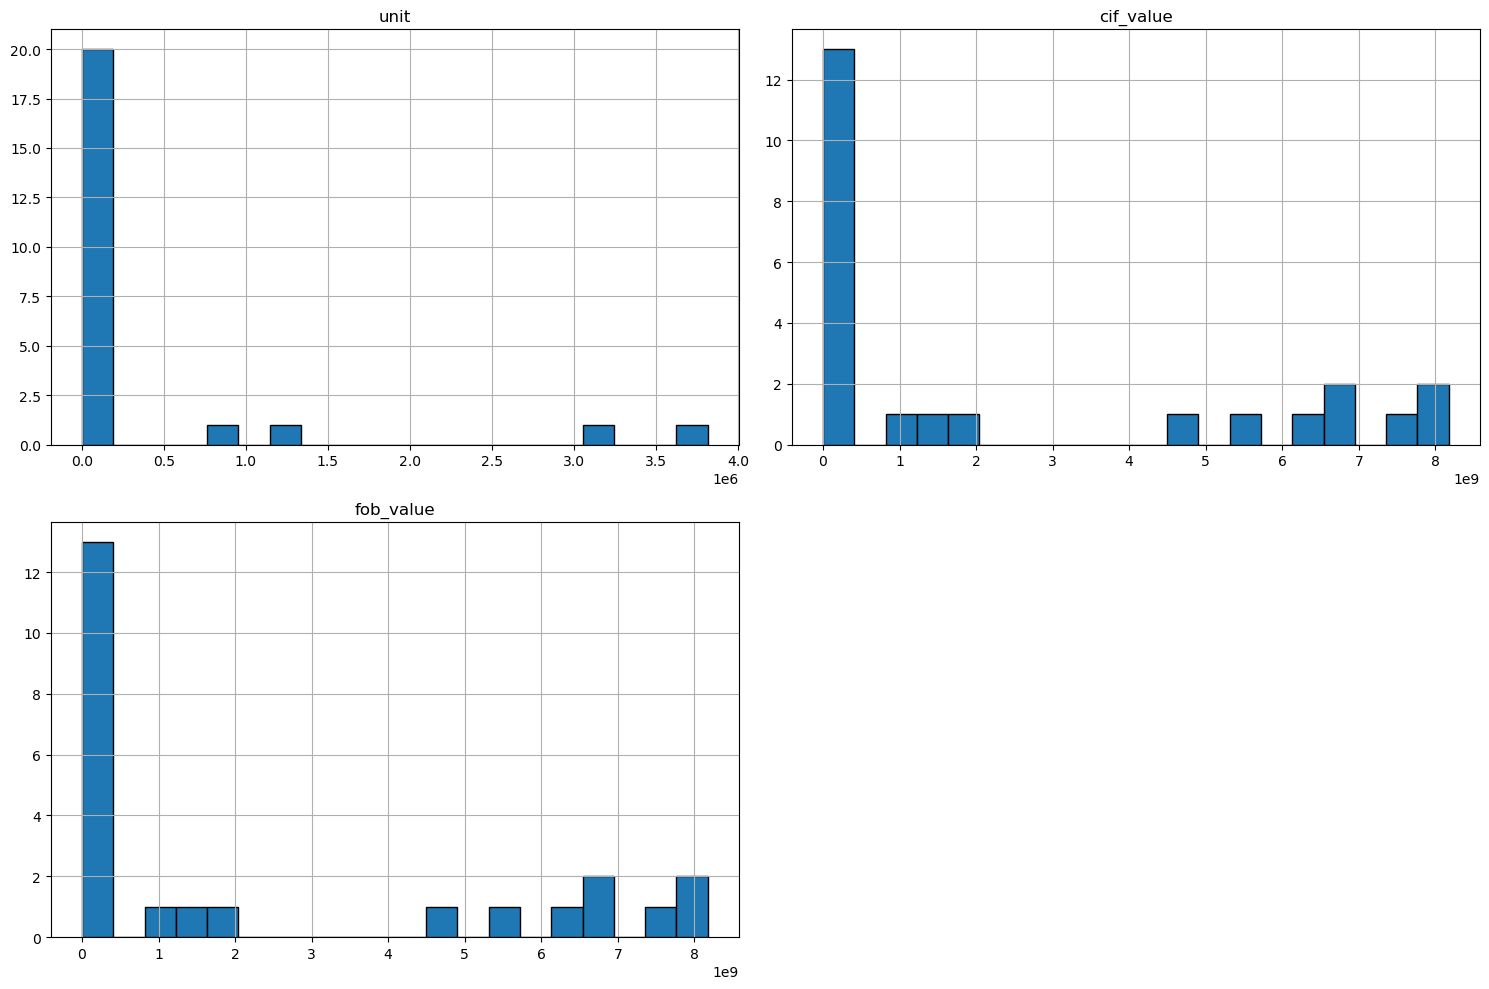

In [48]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_file.csv')

combined_df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


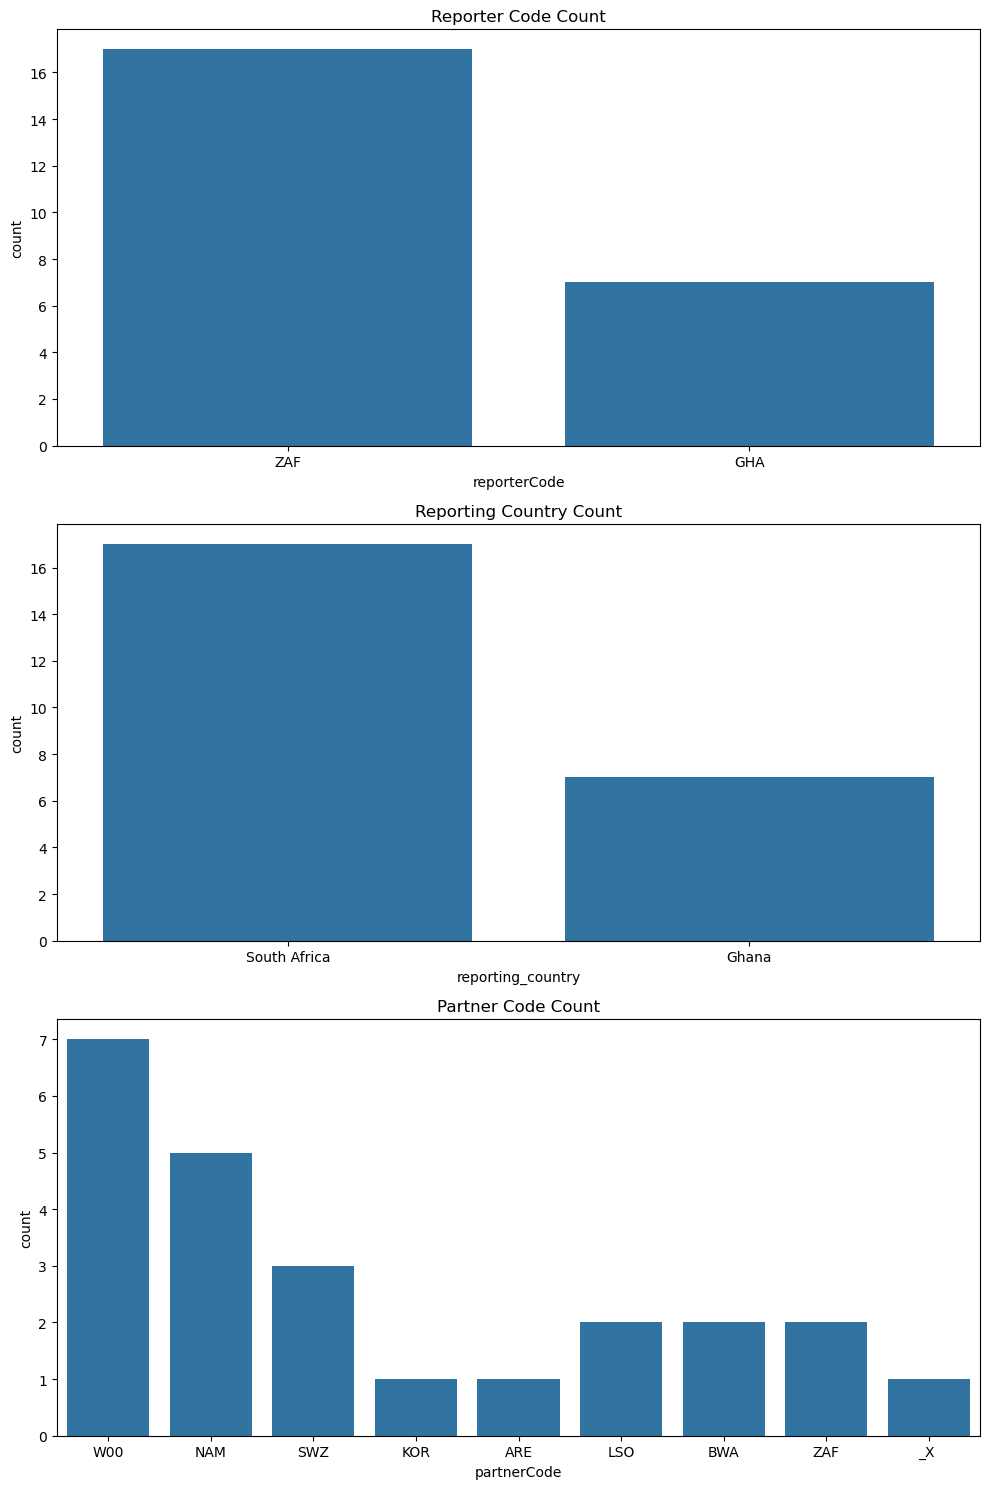

In [54]:

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # 3 vertical subplots

# Plot 1
sns.countplot(data=combined_df, x='reporterCode', ax=axes[0])
axes[0].set_title('Reporter Code Count')

# Plot 2 (corrected column name)
sns.countplot(data=combined_df, x='reporting_country', ax=axes[1])
axes[1].set_title('Reporting Country Count')

# Plot 3
sns.countplot(data=combined_df, x='partnerCode', ax=axes[2])
axes[2].set_title('Partner Code Count')

plt.tight_layout()
plt.show()



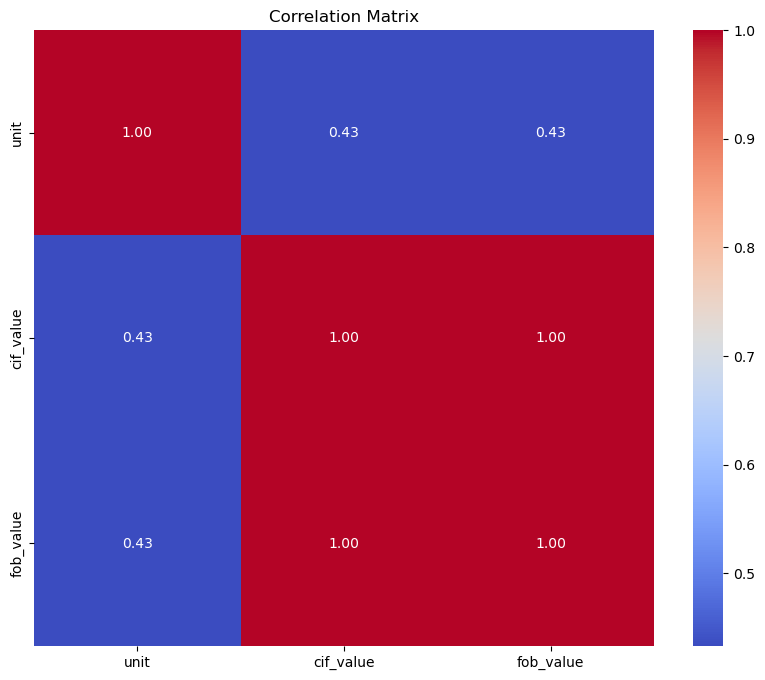

In [58]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


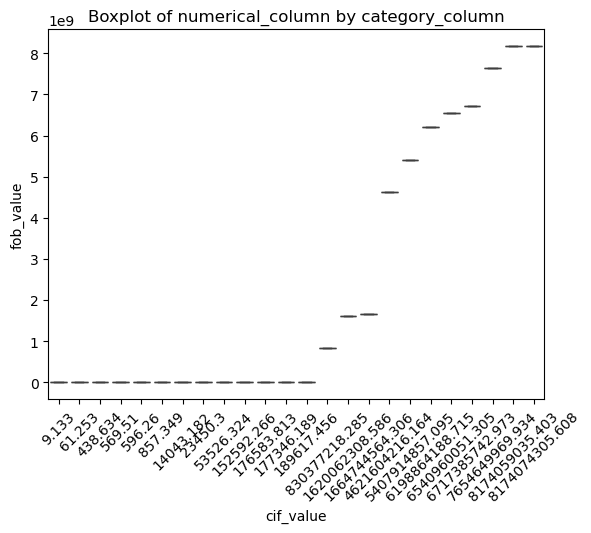

In [70]:
#Visualizing trade value consistency across valuation methods
sns.boxplot(data=combined_df, x='cif_value', y='fob_value')
plt.title('Boxplot: ')
plt.xticks(rotation=45)
plt.show()


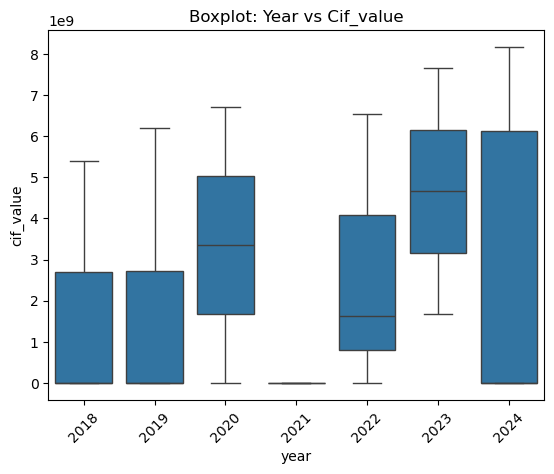

In [110]:
sns.boxplot(data=combined_df, x='year', y='cif_value')
plt.title('Boxplot: Year vs Cif_value')
plt.xticks(rotation=45)
plt.show()


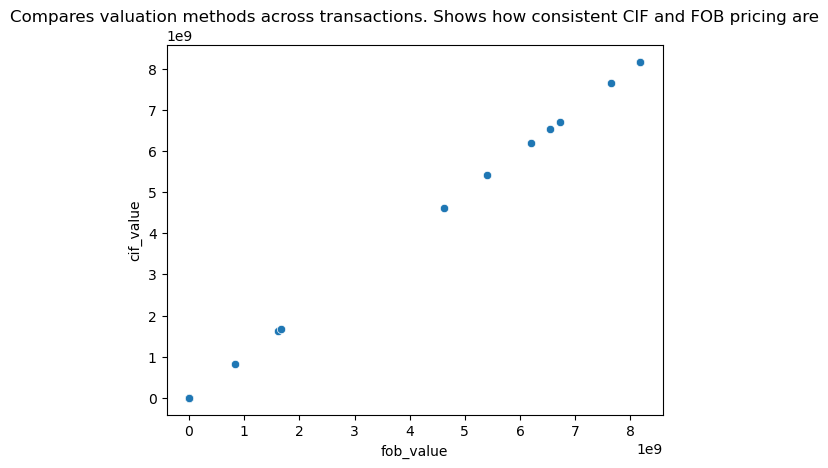

In [104]:

sns.scatterplot(data=combined_df, x='fob_value', y='cif_value')
plt.title('Compares valuation methods across transactions. Shows how consistent CIF and FOB pricing are')
plt.show()
